In [43]:
import numpy as np
import pandas as pd
import ast
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [44]:
processed_path = '../Data/Processed/sub01_binned.csv'
eeg_data = pd.read_csv(processed_path)

eeg_task_path = '../Data/Processed/sub01_binned_task.csv'
eeg_task = pd.read_csv(eeg_task_path)

In [45]:
def plot_explained_variance(eeg_data, max_length=2047, max_components=20):
    """
    Applies PCA to the flattened EEG data and plots the cumulative explained variance.
    
    Parameters:
        eeg_data (pd.DataFrame): DataFrame where each cell contains a list of voltage values.
        max_length (int): The fixed length to truncate or pad each list to.
        max_components (int): The maximum number of components to consider for PCA.
    """
    # Step 1: Drop non-electrode columns like 'label' and 'label_type'
    eeg_data_filtered = eeg_data.drop(columns=['label', 'label_type'])

    # Step 2: Flatten the data for each trial across all electrodes
    flattened_data = []
    for trial in range(eeg_data.shape[0]):
        trial_data = []
        for col in eeg_data_filtered.columns:
            # Convert string to list
            channel_data = ast.literal_eval(eeg_data_filtered[col].iloc[trial])
            
            # Truncate or pad the list to max_length
            if len(channel_data) > max_length:
                channel_data = channel_data[:max_length]
            else:
                channel_data = channel_data + [0] * (max_length - len(channel_data))
            
            # Append the flattened channel data
            trial_data.extend(channel_data)
        
        flattened_data.append(trial_data)
    
    # Convert to a NumPy array
    flattened_data = np.array(flattened_data)
    
    # Step 3: Apply PCA
    pca = PCA(n_components=max_components)
    pca.fit(flattened_data)
    
    # Step 4: Calculate cumulative explained variance
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Step 5: Plot the cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Step 6: Print the optimal number of components
    optimal_components_90 = np.argmax(explained_variance >= 0.90) + 1
    optimal_components_95 = np.argmax(explained_variance >= 0.95) + 1
    print(f"Number of components to retain 90% variance: {optimal_components_90}")
    print(f"Number of components to retain 95% variance: {optimal_components_95}")

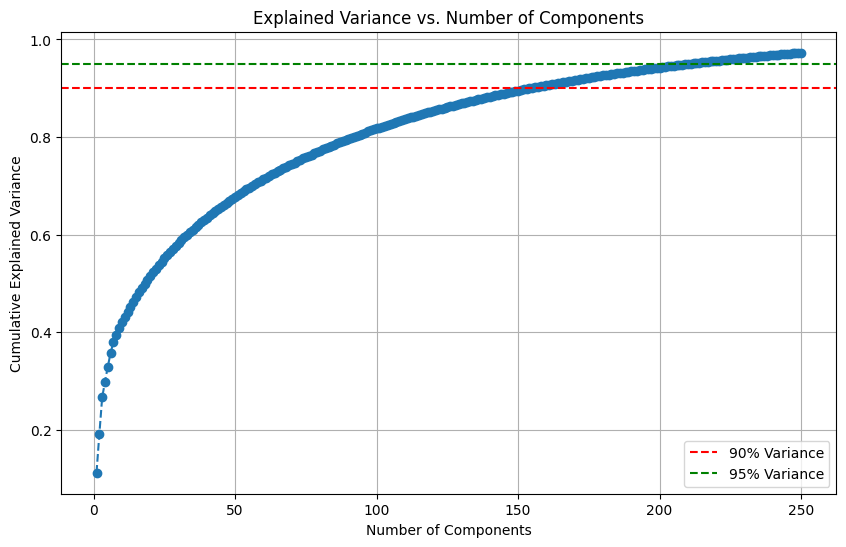

Number of components to retain 90% variance: 155
Number of components to retain 95% variance: 211


In [46]:
plot_explained_variance(eeg_task, max_length=1023, max_components=250)